# Q1

When we approach a new estimation problem from a GMM perspective there's a simple set of steps we can follow:

- Describe the parameter space B<sub>i</sub>
- Describe a function g<sub>j</sub>(b) such that E[g<sub>j</sub>(β)] = 0
- Describe an estimate for the covariance matrix E[g<sub>j</sub>(β)g<sub>j</sub>(β)<sup>T</sup>]


1. Explain how the steps outlined above can be used to construct an optimally weighted GMM estimator.






## Q1.1
(1) The first step, defining a parameter space, is necessary for calculating a system of of moment equations, which the specified parameters will solve.

We then take a set of known $l × 1$ function of equations $g_j(b)$ that can be summarized by a moment equation model that takes the form $E[g_j(β)] = 0$, given a $k × 1$ parameter space $β \in B$. A method of moments estimator will give us the parameter value that sets the sample analog of $g_j(B)$ to 0. In the just identified case, the GMM estimator will be the same as the method of moments estimator. In the overidentified case, however, the method of moments estimator is not defined. The GMM estimator is a generalized version of the method of moments estimator that minimizes the weighted sum of squares given some non-negative matrix of weights $𝐖$.

The GMM estimator can be defined using the GMM criterion function that is the weighted sum of squared moment equation errors, which is step 3, given as follows:

> $J(β) = n \bar{g}_j(\beta)'𝐖 \bar{g}_j(\beta)$

The optimally weighted GMM estimator will be the parameter value that minimizes the GMM criterion, which is defined for both just-identified and overidentified cases.

## 1.2

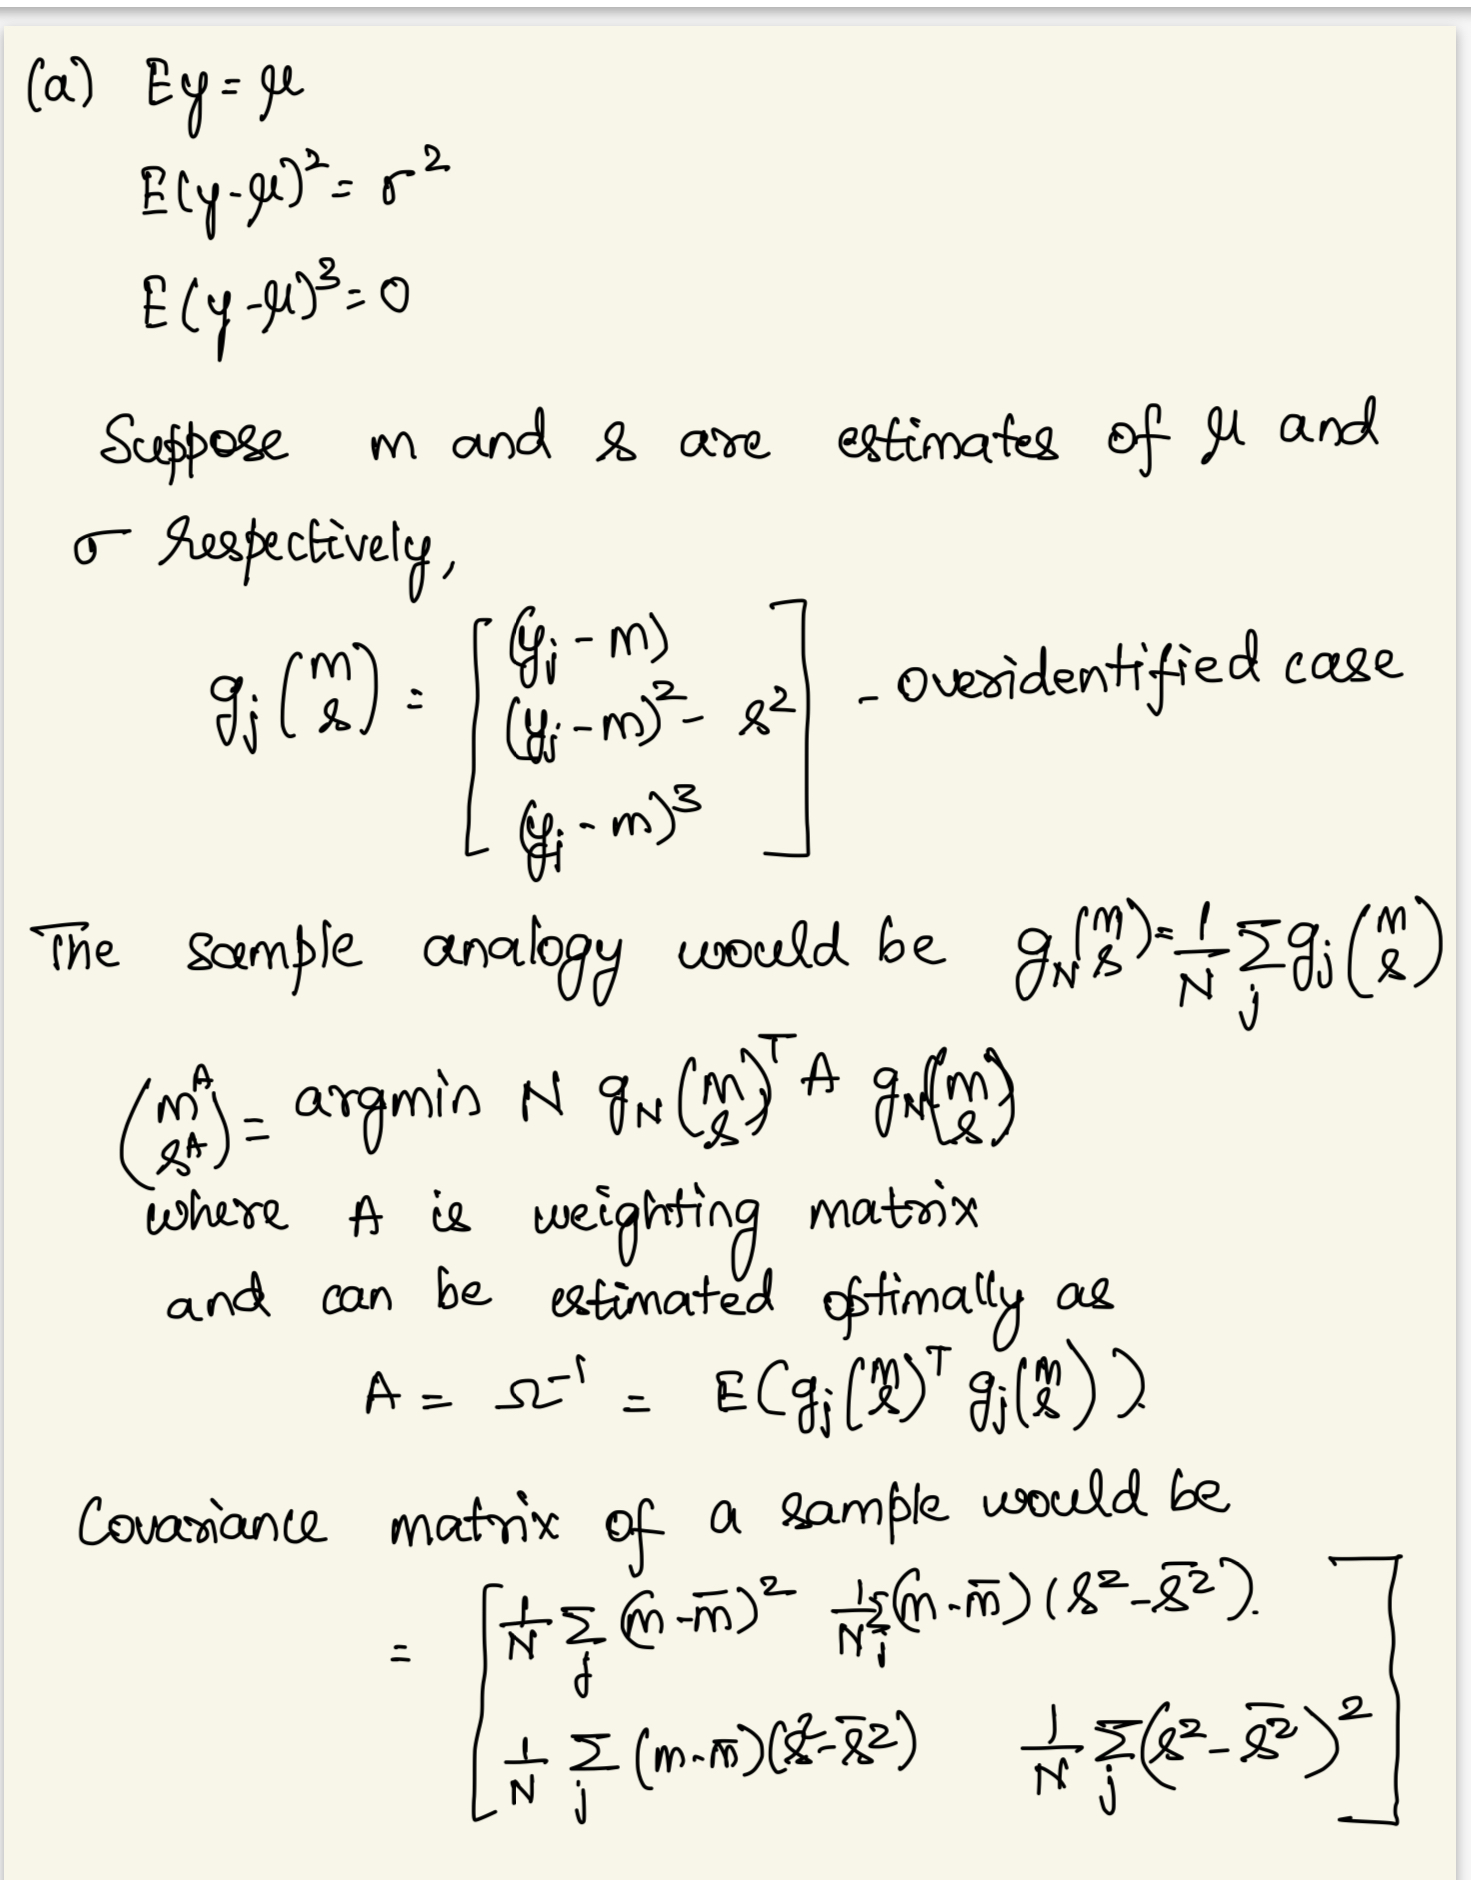

[link text](https://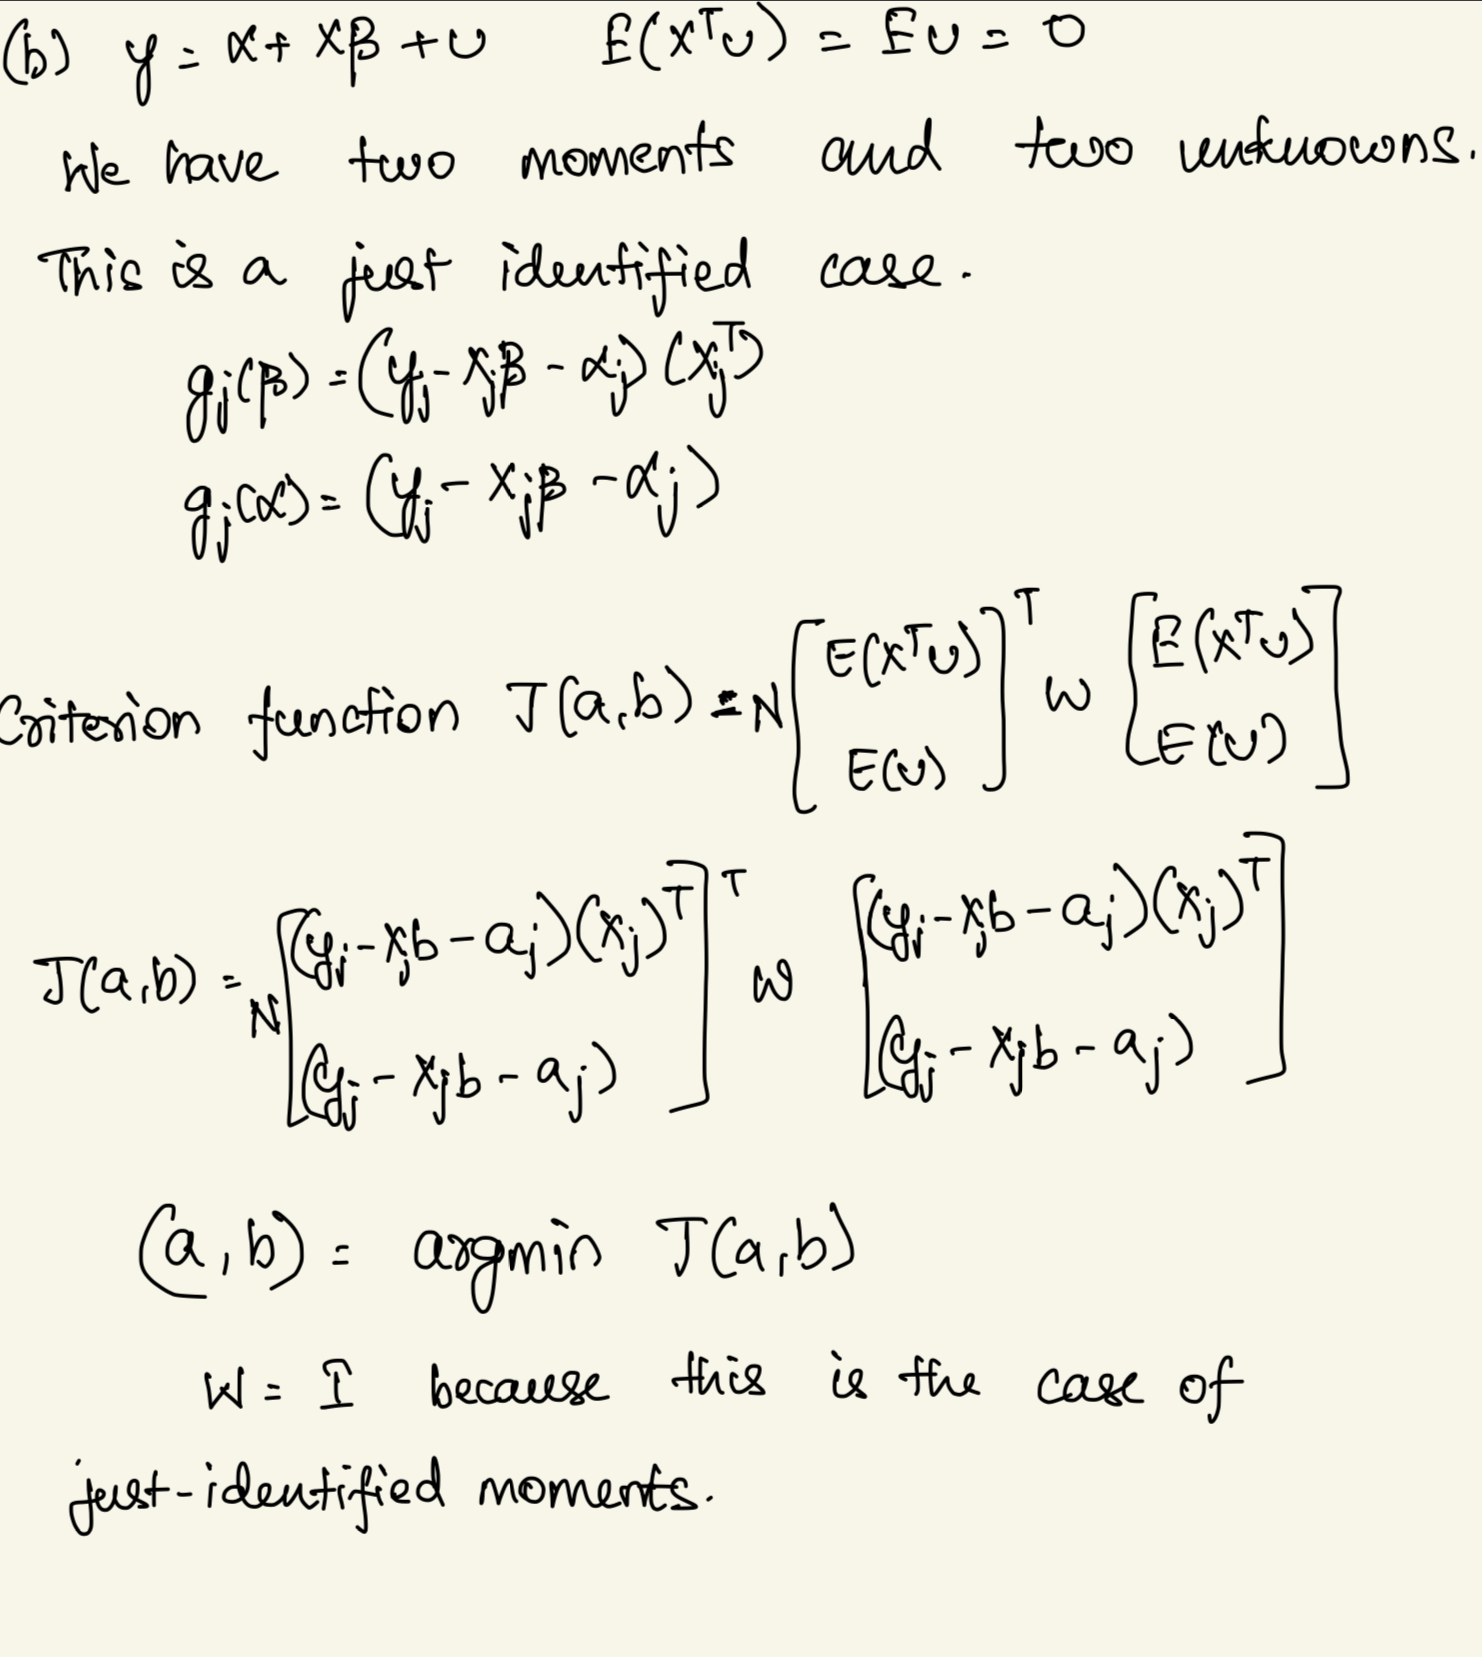)

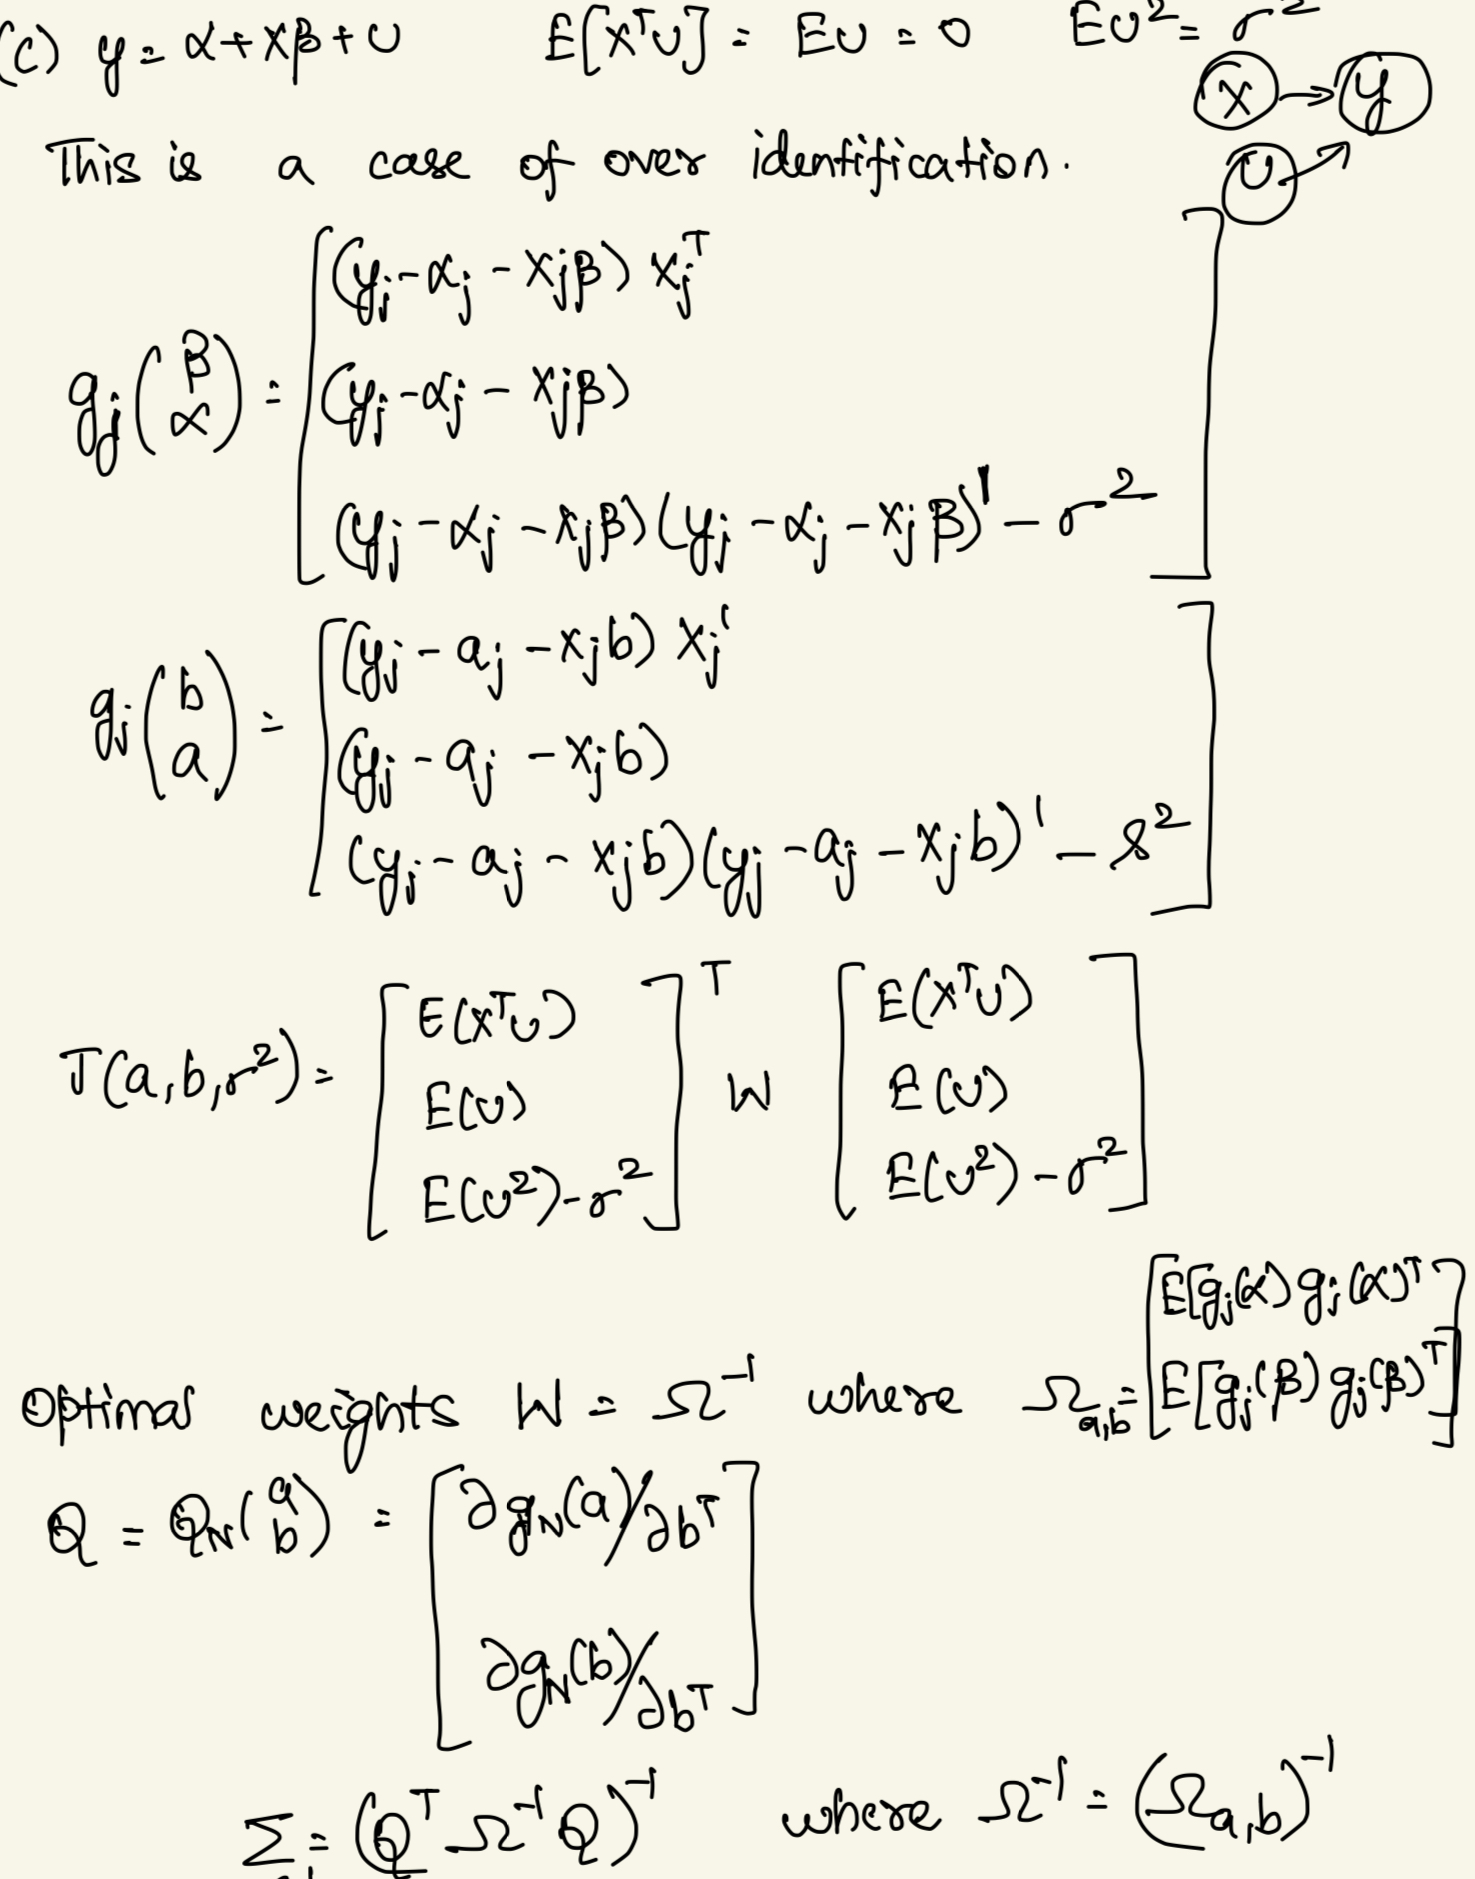

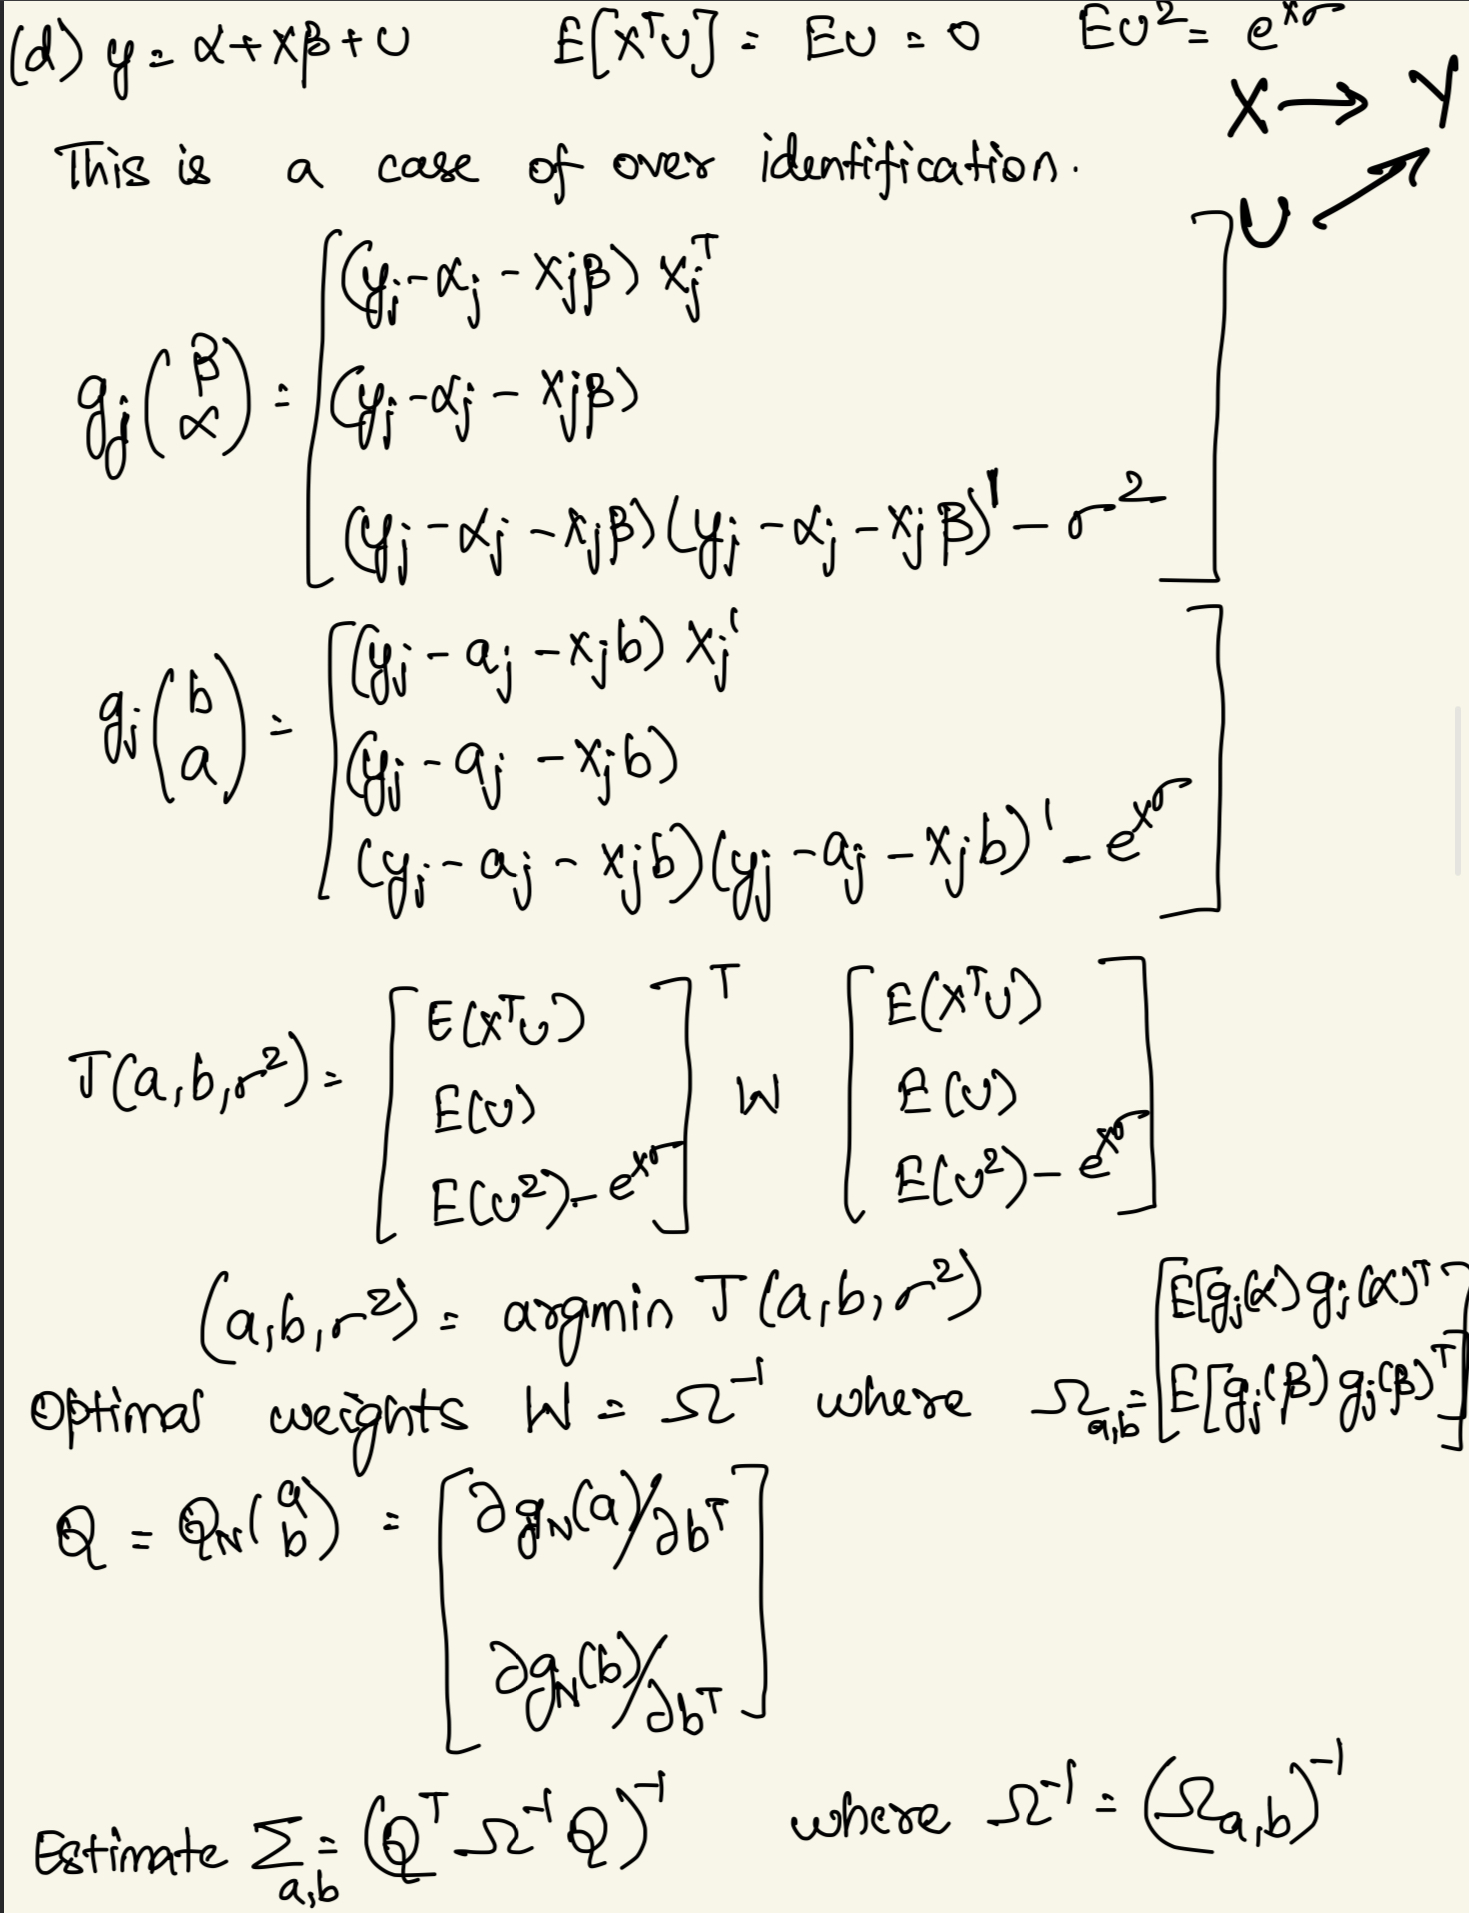

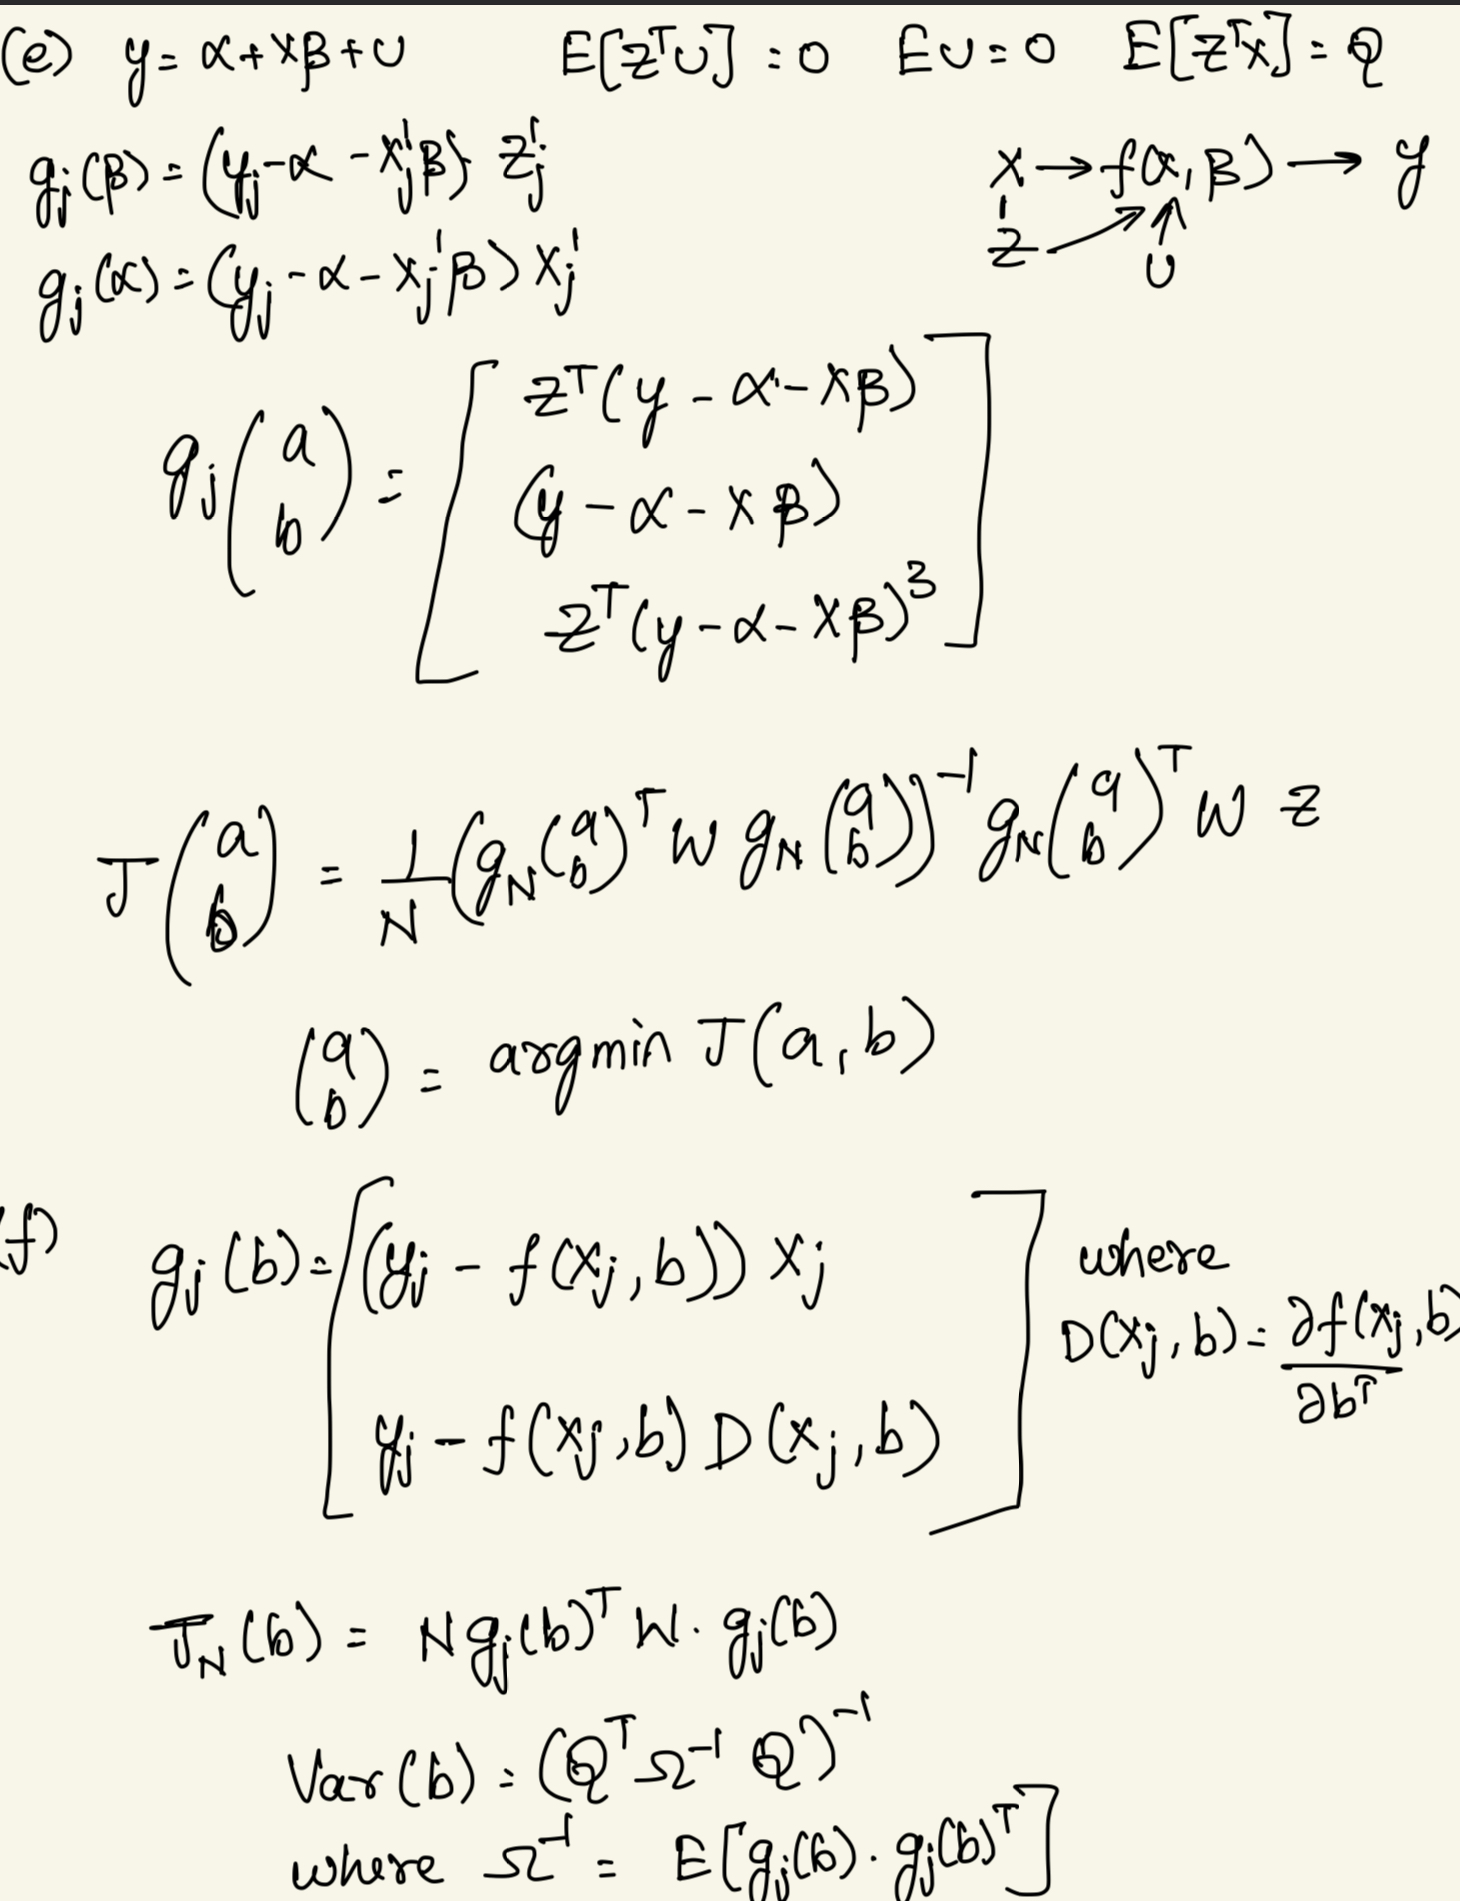

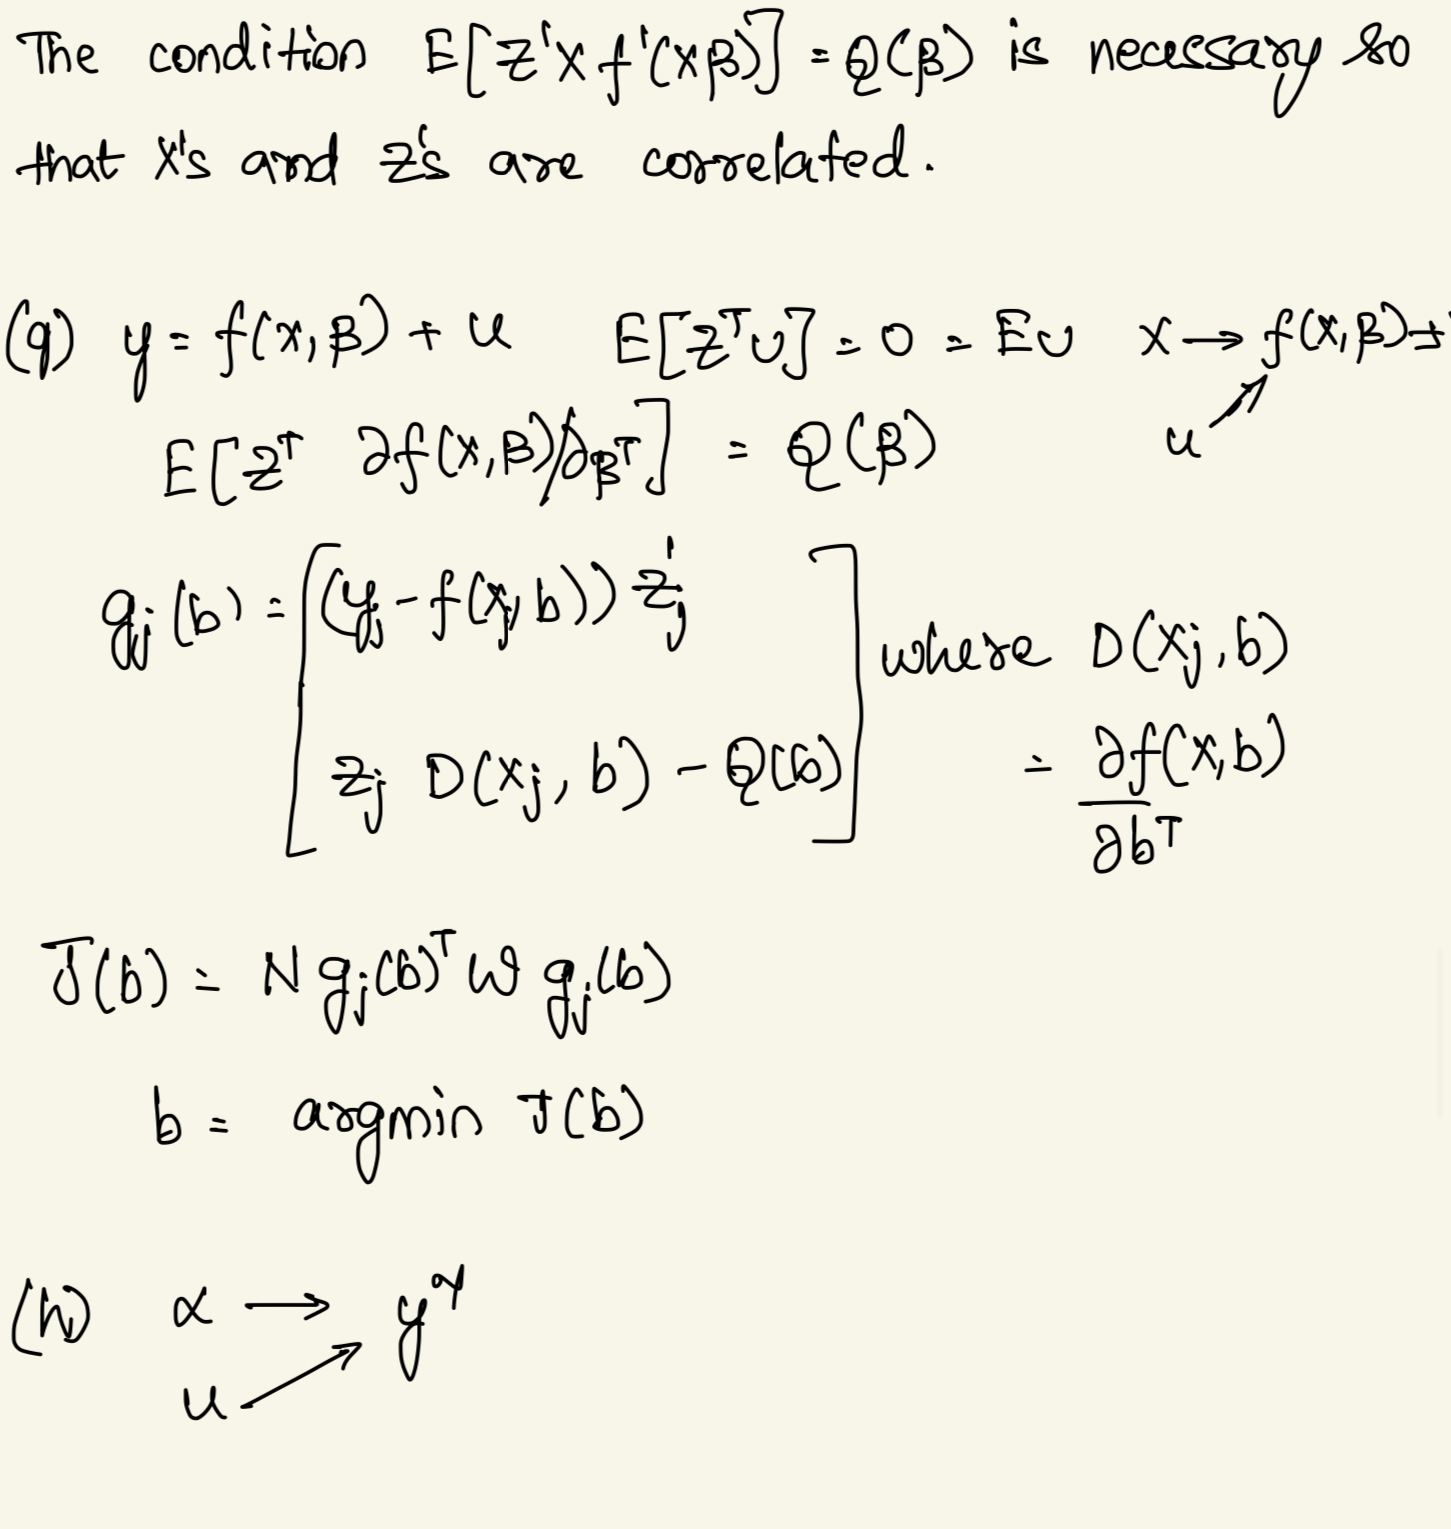

## 1.3

In [18]:
#1.3a
import numpy as np
def dgp_a(N, b0):
    X = np.ones((N, 1))
    # Generate error term u ~ N(0, 1)
    u = np.random.normal(size=N)
    mu = b0[0]  # True mean parameter (intercept)
    sigma2 = b0[1]  # True variance parameter
    y = mu + np.sqrt(sigma2) * u
    return y, X

    #generate
    N = 1000  # Sample size
    b0 = np.array([2, 1])
    y, X = dgp_a(N, b0)

In [19]:
#1.3b

def dgp_b(N, b0):
    k = len(b0) - 1
    X = np.random.normal(size=(N, k))
    X_with_intercept = np.column_stack((np.ones(N), X))
    u = np.random.normal(size=N)  # Generate error term u
    y = np.dot(X_with_intercept, b0) + u
    return y, X_with_intercept

# generate:
N = 1000
alpha = 2
b0 = np.array([1, -0.5])
y, X = dgp_b(N, b0)

In [20]:
#1.3.c
def dgp_c(N, b0, sigma):
    k = len(b0) - 1
    X = np.random.normal(size=(N, k))
    X_with_intercept = np.column_stack((np.ones(N), X))
    u = np.random.normal(scale=np.sqrt(sigma), size=N)
    y = np.dot(X_with_intercept, b0) + u
    return y, X_with_intercept

# generate:
N = 1000
b0 = np.array([2, 1, -0.5])
y, X = dgp_c(N, b0, sigma)

In [21]:
#1.3.d
def dgp_d(N, b0, sigma):
    k = len(b0) - 1
    X = np.random.normal(size=(N, k))
    X_with_intercept = np.column_stack((np.ones(N), X))
    u = np.random.exponential(scale=sigma, size=N)
    y = np.dot(X_with_intercept, b0) + u
    return y, X_with_intercept

# generate:
N = 1000
b0 = np.array([2, 1, -0.5])
sigma = 0.5
y, X = dgp_d(N, b0, sigma)

In [31]:
#1.3.e

def dgp_e(N, b0, Q):
    k = len(b0)
    p = Q.shape[0]
    Z = np.random.normal(size=(N, p))
    X = np.dot(Z, np.linalg.cholesky(Q).T)
    alpha = b0[0]
    beta = b0[1:]
    u = np.random.normal(size=N)
    y = alpha + np.dot(X, beta) + u
    return y, X


N = 1000
b0 = np.array([2, 1, -0.5])
Q = np.array([[1, 0.5], [0.5, 1]])
y, X = dgp_e(N, b0, Q)

# Q3


(1) The condition $a.i: E[u.x] = E[u] = 0$ refers to the zero conditional mean assumption, which states there is no covariance of the error term and the regressors, i.e., the regressors are exogenous to the error term in the model.

This conditional is untestable because we do not dirtectly observe $u$, which is an unknown population parameter.   

(2) The condition $a.ii = E[u^2|x] = σ^2$ refers to the homoskedasticity assumption stating the the variance of the error terms conditional on the regressors is constant, i.e, the variance of the error doesn't vary with $x$.

The Breusch and Pagan (1979) auxiliary regression approach proposes a test of homoskedasticity using the squared residual as an estimator for the error term. The auxiliary regression will then regress the squared residuals, $û = (y-ŷ)^2$ , on the independent variables to test whether the estimator of the squared error term, the squared residual, varies with $x$. The estimated coefficient $d$ is the metric of interest in the auxiliary regression.

The null hypothesis $H_0: d = 0$ implies there is no variance of the residuals with $x$, indicating the homoskedasticity assumption holds up. If $d \ne 0$ and the coefficient is statistically significant (using a t-test), it is an idnication of some sort of heteroskedastic relationship between the residuals and the regressors.

This simple test essentially employs the OLS framework to test for the existence of a significant relationship between the estimated residuals and the regressors in the model. The results indicate a potential violation of the homoskedasticity assumption.

(3) Using the two given assumptions, we can construct the moment conditions as follows. The first moment condition will be similar to condition $a.i$:

> $E[u.x] =0$

The second condition, $a.ii$, can be readjusted to fit the Breusch and Pagan framework, resulting in the second moment condition:

> $E[u^2 - σ^2]x = 0$

Combining the two moment conditions, we get the central moment equations:

> $g(β, σ^2) = ((y-x'β)x) \\ \qquad \qquad ((y-x'β)^2 - σ^2)x$

The sample analog follows:

> $\bar{g}_n(β, σ^2) = \frac{1}{n}∑^{n}_{i=1} g(\beta, σ^2)$

And the GMN criterion function will be:

> $J(β, σ^2) = n\bar{g}_n(β, σ^2)'𝐖\bar{g}_n(β, σ^2)$

The GMM estimators for β and σ^2 will result in the parameter values that minimizes the criterion function optimally.

(4) The relative advantage of the BP test is its simplicity and ease of use in the lineae OLS case. All we have to do is fit the auxiliary regression and conduct a simple hypothesis test to check for heteroskedasticity. Its effectiveness might be reduced in the non-linear setting and we have to know and make an assumption on the functional form of the variance of $u$. Without those assumptions, the test will be uninformative.   

The GMM version will be  more flexible and can handle non-linear relationships as well as unknown functional forms for the variance of $u$. It could also be more efficient as it will estimate the optimally weigthed parameter values. Hence, it could be a more robust version to the BP test. However, the GMM version can be more complicated and computationally expensive.

(5) Given the updated condition $E[u^2|x] = σ^2(x) = σ^2sin(2x)$, the BP test won't perform well as the variance of $u$ conditional on $x$ is now not constant and varies with $x$, in addition to being distributed in a non-linear form. The BP test works under the constant variance assumption.

The moment conditions for the GMM estimator above could be modified as follows to account for the adjusted condition $a.ii$:

> $g(β, σ^2) = ((y-x'β)x) \\ \qquad \qquad  ((y-x'β)^2 - σ^2sin(2x))x$

The other steps follow in a similar manner.



(6) If we don't know the functional form of $E[u^2|x]$ apart from the fact that it takes some form $f(x)$, we can try to adapt the BP test in a few ways.

One possible adjustment to the BP is to reformulate the auxiliary regression idea to non-parametrically estimate $\hat{f}(x)$ (using kernel regression for instance) and conduct a hypotheses with the null hypothesis that the distribution of the variance form is constant: $H_0: \hat{f}(x) = σ^2$. If the estimate for $\hat{f}(x)$ points to a non-constant and the estimate is significant, we can reject the null that the variance of the error term is homoskedastic.





(7) If $f(x)$ is not constant, we can construct a semi-parametric approach to the BP test that takes account of the non-linearity in $f(x)$ and uses likelihood estimation to estimate $\hat{f}(x)$. One way to do so is by assuming some form of exponential distribution of $f(x)$ and estimate $\hat{f}(x)$ using a feasible GLS estimation framework.

Q4 Tests of Notmality


In [ ]:
#4.1
import numpy as np
from scipy.special import factorial2  # double factorial

def estimate_moments(x, k):
    n = len(x)
    mu_est = np.mean(x)
    sigma_est = np.std(x)  # calculate the standard deviation
    moments_est = np.zeros(k)
    for i in range(1, k+1):
        if i % 2 == 0:  # even moment
            moments_est[i-1] = np.mean((x - mu_est)**i) - sigma_est**i * factorial2(i-1)
        else:  # odd moment
            moments_est[i-1] = np.mean((x - mu_est)**i)
    return moments_est

x = np.random.normal(0, 1, size=1000)
k = 4  # number of moments
moments_est = estimate_moments(x, k)
print("Estimated moments:", moments_est)



Estimated moments: [ 4.44089210e-18  1.11022302e-16 -3.23551227e-02 -1.65655183e-01]


4.2 Covariance Matrix

In [ ]:
def moment_covariance(x, k):
    n = len(x)
    mu = np.mean(x)
    sigma = np.std(x, ddof=1)
    g = np.zeros((k, n))
    for i in range(k):
        if (i + 1) % 2 == 0:  # even moments
            g[i, :] = (x - mu)**(i + 1) - sigma**(i + 1) * factorial2(i)
        else:  # odd moments
            g[i, :] = (x - mu)**(i + 1)
    cov_matrix = np.cov(g)
    return cov_matrix

# Example usage:
cov_matrix = moment_covariance(x, k)
print("Covariance matrix of moment restrictions:", cov_matrix)


Covariance matrix of moment restrictions: [[ 9.75839194e-01 -3.23875103e-02  2.68810861e+00 -4.11644207e-01]
 [-3.23875103e-02  1.73679874e+00 -3.80070810e-01  9.19423080e+00]
 [ 2.68810861e+00 -3.80070810e-01  1.18137215e+01 -3.50315922e+00]
 [-4.11644207e-01  9.19423080e+00 -3.50315922e+00  6.34811988e+01]]


4.3 GMM Test

In [ ]:
from scipy.optimize import minimize
from scipy.stats import chi2

def gmm_objective(params, x, k):
    mu, sigma = params
    moments = estimate_moments(x, k)
    weight_matrix = np.linalg.inv(moment_covariance(x, k))  # Optimal weighting
    return moments.T @ weight_matrix @ moments

def perform_gmm_test(x, k):
    initial_guess = [np.mean(x), np.std(x)]
    result = minimize(gmm_objective, initial_guess, args=(x, k))
    j_stat = result.fun
    p_value = 1 - chi2.cdf(j_stat, df=k-2)
    return result.x, j_stat, p_value

# Example usage:
mu_sigma_est, j_stat, p_value = perform_gmm_test(x, k)
print("GMM Estimates:", mu_sigma_est)
print("J-Statistic:", j_stat)
print("P-Value:", p_value)


GMM Estimates: [-0.04135958  1.01459319]
J-Statistic: 0.016962294682031434
P-Value: 0.9999998989699255


4.Optimal choice of
𝑘 depends on the balance between model complexity and overfitting. Increasing 𝑘 improves the robustness of the test against deviations from normality but also increases the risk of overfitting

Comaprision with MLE


In [ ]:
def compare_gmm_mle(x):
    mle_mu, mle_sigma = np.mean(x), np.std(x, ddof=1)
    gmm_mu, gmm_sigma = perform_gmm_test(x, 4)[0]
    return (mle_mu, mle_sigma), (gmm_mu, gmm_sigma)

# Example usage:
mle_est, gmm_est = compare_gmm_mle(x)
print("MLE Estimates:", mle_est)
print("GMM Estimates:", gmm_est)


MLE Estimates: (-0.04135958427770974, 1.015100866413118)
GMM Estimates: (-0.04135958427770974, 1.0145931890288198)


# Q5

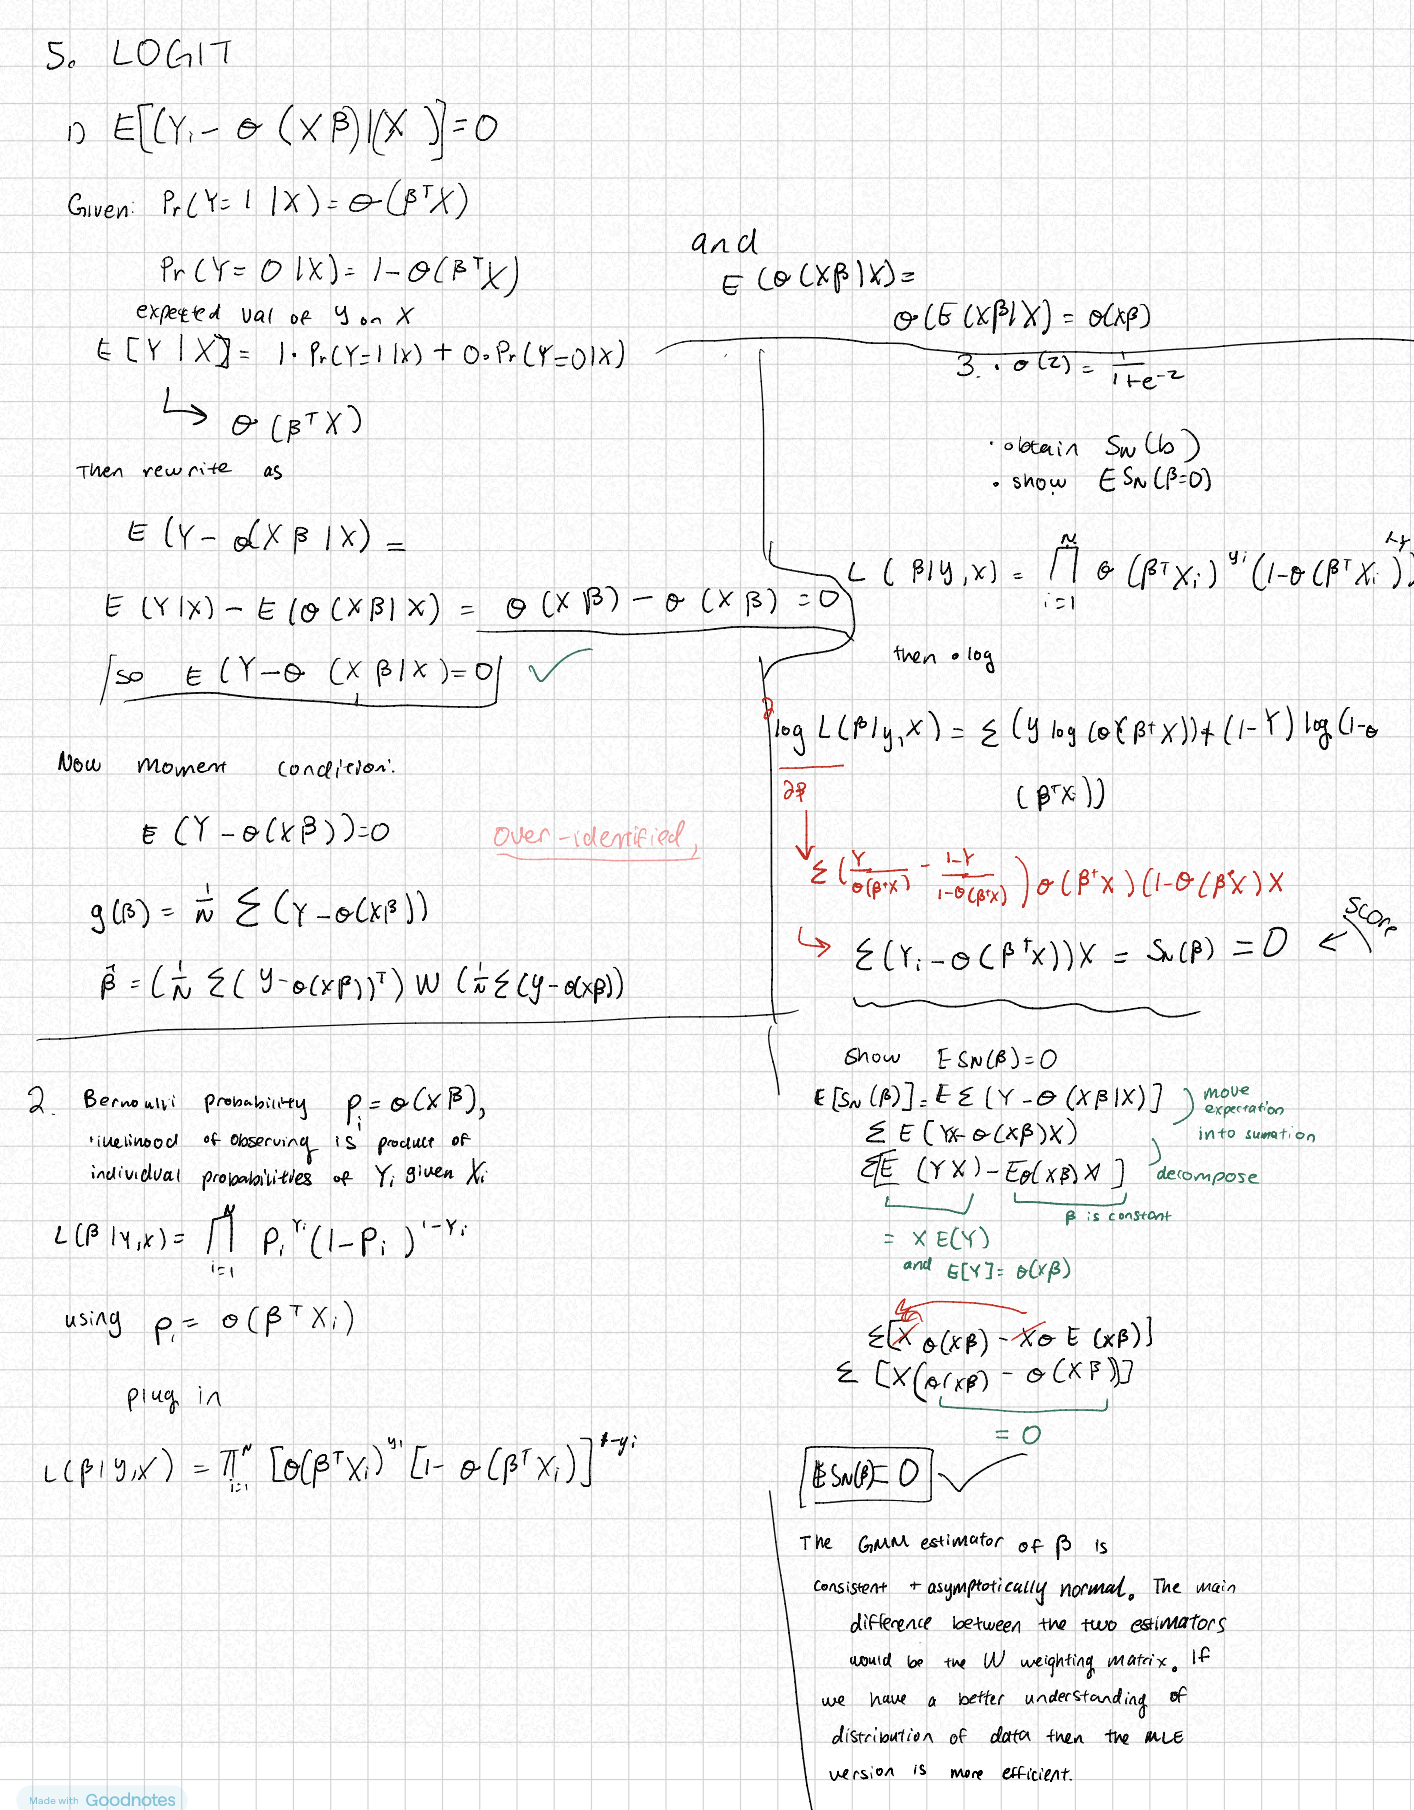